# In-Class Activity: Combining Data Sets

February 9, 2023

Today we will get some hands-on practice combining dataframes together in some useful ways:
* merging / joinging
* concatenating

## Part 1: Back to air quality data

Remember the air quality index (AQI) data we worked with a few weeks back?

We want to see if there is any relationship between the AQI and the temperature.

How might we do that?

In [1]:
# Import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# We have two data files: 
# one for AQI from 2022 for Walla Walla, WA ("walla-walla-aqidaily2022.csv")
# and one for daily high and low temperatures ("walla-walla-temp-sep2022.csv")

# First let's import the data files as dataframes


In [3]:
df_AQI = pd.read_csv("walla-walla-aqidaily2022-1.csv")
df_temp = pd.read_csv("walla-walla-temp-sep2022.csv")

In [4]:
# Examine the data frames -- what columns do they each contain?

In [5]:
df_AQI

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25
0,01/01/2022,62,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,35,8,62
1,01/02/2022,43,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,41,10,43
2,01/03/2022,42,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,42,9,13
3,01/04/2022,33,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,33,10,17
4,01/05/2022,39,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,34,7,39
...,...,...,...,...,...,...,...,...,...
360,12/27/2022,37,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,37,.,3
361,12/28/2022,36,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,36,.,11
362,12/29/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,31,.,20
363,12/30/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,31,.,19


In [6]:
df_temp

,Day,Max_Temp,Min_Temp,Avg_Temp,Precipitation
0,2022-09-01,96,69,82.5,0
1,2022-09-02,103,62,82.5,0
2,2022-09-03,86,66,76.0,T
3,2022-09-04,88,57,72.5,0
4,2022-09-05,84,59,71.5,0
5,2022-09-06,86,56,71.0,0
6,2022-09-07,89,62,75.5,0
7,2022-09-08,77,55,66.0,0
8,2022-09-09,81,51,66.0,0
9,2022-09-10,87,50,68.5,0


In [7]:
# We are going to merge/join them
# To do this, we need to have at least one SHARED column between the two data frames
# Do we have that?
# Yes! We have "Date" in the AQI one and "Day" in the temperature one...
# Let's try...
# We will use .merge()
# Here's the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html


Last time...our merge didn't work!

Why? Because we had two different formats for our Day/Date

How might we fix this?

 Introducing... datetime! See: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

Datetime objects (including timestamps and time intervals) are special kinds of objects. They let us do time-based calculations (which are very useful).

In [8]:
# Let's make a new column in each data frame that has the date/day, but as a pandas datetime object

df_AQI['D']=pd.to_datetime(df_AQI['Date'])
df_temp['D']=pd.to_datetime(df_temp['Day'])
df_AQI

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25,D
0,01/01/2022,62,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,35,8,62,2022-01-01
1,01/02/2022,43,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,41,10,43,2022-01-02
2,01/03/2022,42,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,42,9,13,2022-01-03
3,01/04/2022,33,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,33,10,17,2022-01-04
4,01/05/2022,39,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,34,7,39,2022-01-05
...,...,...,...,...,...,...,...,...,...,...
360,12/27/2022,37,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,37,.,3,2022-12-27
361,12/28/2022,36,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,36,.,11,2022-12-28
362,12/29/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,31,.,20,2022-12-29
363,12/30/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,31,.,19,2022-12-30


In [9]:
df_temp

,Day,Max_Temp,Min_Temp,Avg_Temp,Precipitation,D
0,2022-09-01,96,69,82.5,0,2022-09-01
1,2022-09-02,103,62,82.5,0,2022-09-02
2,2022-09-03,86,66,76.0,T,2022-09-03
3,2022-09-04,88,57,72.5,0,2022-09-04
4,2022-09-05,84,59,71.5,0,2022-09-05
5,2022-09-06,86,56,71.0,0,2022-09-06
6,2022-09-07,89,62,75.5,0,2022-09-07
7,2022-09-08,77,55,66.0,0,2022-09-08
8,2022-09-09,81,51,66.0,0,2022-09-09
9,2022-09-10,87,50,68.5,0,2022-09-10


In [10]:
df_mergeA=df_AQI.merge(df_temp, on='D',how="left")
df_mergeA


,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25,D,Day,Max_Temp,Min_Temp,Avg_Temp,Precipitation
0,01/01/2022,62,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,35,8,62,2022-01-01,NaN,NaN,NaN,NaN,NaN
1,01/02/2022,43,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,41,10,43,2022-01-02,NaN,NaN,NaN,NaN,NaN
2,01/03/2022,42,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,42,9,13,2022-01-03,NaN,NaN,NaN,NaN,NaN
3,01/04/2022,33,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,33,10,17,2022-01-04,NaN,NaN,NaN,NaN,NaN
4,01/05/2022,39,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,34,7,39,2022-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2022,37,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,37,.,3,2022-12-27,NaN,NaN,NaN,NaN,NaN
361,12/28/2022,36,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,36,.,11,2022-12-28,NaN,NaN,NaN,NaN,NaN
362,12/29/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,31,.,20,2022-12-29,NaN,NaN,NaN,NaN,NaN
363,12/30/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AirNow,31,.,19,2022-12-30,NaN,NaN,NaN,NaN,NaN


In [11]:
df_mergeB=df_AQI.merge(df_temp, on='D',how='inner')
df_mergeB

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM10,PM25,D,Day,Max_Temp,Min_Temp,Avg_Temp,Precipitation
0,09/01/2022,67,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,67,36,56,2022-09-01,2022-09-01,96,69,82.5,0
1,09/02/2022,63,PM2.5,WALLA WALL - 12TH ST,53-071-0005,AQS,51,56,63,2022-09-02,2022-09-02,103,62,82.5,0
2,09/03/2022,54,PM10,BURBANK - MAPLE ST,53-071-0006,AQS,39,54,53,2022-09-03,2022-09-03,86,66,76.0,T
3,09/04/2022,36,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,36,11,15,2022-09-04,2022-09-04,88,57,72.5,0
4,09/05/2022,31,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,31,15,13,2022-09-05,2022-09-05,84,59,71.5,0
5,09/06/2022,45,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,45,37,18,2022-09-06,2022-09-06,86,56,71.0,0
6,09/07/2022,46,Ozone,Confederated Tribes of the Umatilla Indian Res...,53-013-9991,AQS,46,44,24,2022-09-07,2022-09-07,89,62,75.5,0
7,09/08/2022,56,PM10,BURBANK - MAPLE ST,53-071-0006,AQS,36,56,47,2022-09-08,2022-09-08,77,55,66.0,0
8,09/09/2022,55,PM2.5,DAYTON - W MAIN,53-013-0002,AQS,34,50,55,2022-09-09,2022-09-09,81,51,66.0,0
9,09/10/2022,129,PM2.5,DAYTON - W MAIN,53-013-0002,AQS,44,64,129,2022-09-10,2022-09-10,87,50,68.5,0


In [12]:
# Side bar: We can do some super cool stuff now that we have a datetime object!

# What dype is it?
# Note that this particular one is a "Timestamp" (to disambiguate from a time range, etc.)
# You can read more about Timestamps here: https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas.Timestamp

# We can extract the year, month, day, etc.
# COMMENT OUT CODE BELOW TO TRY IT OUT
# print(df_AQI["D"][0]) # print out the whole Timestamp
# print(df_AQI["D"][0].year) # print out just the year
# print(df_AQI["D"][0].month) # print out just the month
# print(df_AQI["D"][0].day) # print out just the day

In [13]:
# Now, we can merge again... but this time, on our new datetime columns

# Try it out... what happens if we use:
# a) how="left"
# b) how="inner"

# YOUR CODE HERE

In [14]:
# Let's examine...
# First look at the left join, then the right join... how are they different?
# Which would we use if we just want to analyze September data?

In [15]:
df_mergeB[["Overall AQI Value", "Max_Temp", "Min_Temp"]].corr()

,Overall AQI Value,Max_Temp,Min_Temp
Overall AQI Value,1.000000,0.201448,0.097323
Max_Temp,0.201448,1.000000,0.527340
Min_Temp,0.097323,0.527340,1.000000


In [16]:
# Now we can do some cool things! Like use .corr to examine correlations
# More on .corr: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# More on the correlation metric (Pearson's correlation): https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

# YOUR CODE HERE

In [17]:
df_mergeB[["Overall AQI Value", "Max_Temp", "Min_Temp"]].corr()

,Overall AQI Value,Max_Temp,Min_Temp
Overall AQI Value,1.000000,0.201448,0.097323
Max_Temp,0.201448,1.000000,0.527340
Min_Temp,0.097323,0.527340,1.000000


In [18]:
# Or, make a scatterplot of AQI versus Max Temp
# More on pyplot's scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

# YOUR CODE HERE

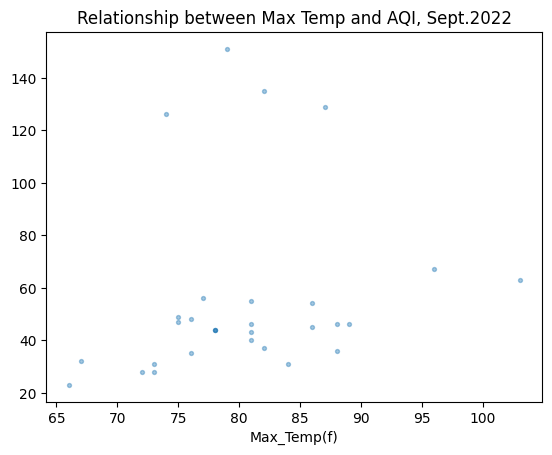

In [19]:
plt.scatter(df_mergeB["Max_Temp"],df_mergeB["Overall AQI Value"],s=8, alpha=0.4)
plt.xlabel("Max_Temp(f)")
plt.title('Relationship between Max Temp and AQI, Sept.2022')
plt.show()

## Part 2: Let's look at ALL the months in 2022

The source of our temperature data, [NOWData/weather.gov](https://www.weather.gov/wrh/Climate) (a service of NOAA) has a frustrating feature:
It lets you download historical daily temperature data for geographic areas like Walla Walla (yay!), but you can only do so for a month at a time (boo!). Note that you can get a _plot_ of an entire year, though (go figure!). Tl;dr: Open data is hard!

But, with our data skills, we can easily combine all of the months into a single data file.

I've done the grunt-work of getting the monthly data for Walla Walla from 2022 for you and putting it in a .zip file, which you can download from Canvas.

Now, your task is to improt each of these files and combine them into a single data frame so we can do some analysis.

How might we do that? Do we need to use join/merge or concatenate?

In [26]:
import pandas as pd
import numpy as np
import matplotlib as pyplot

In [29]:
# Import each month's csv file as a dataframe

# YOUR CODE HERE
df_jan=pd.read_csv('walla-walla-temp-jan2022.csv')
df_feb=pd.read_csv('walla-walla-temp-feb2022.csv')
df_mar=pd.read_csv('walla-walla-temp-mar2022.csv')
df_apr=pd.read_csv('walla-walla-temp-apr2022.csv')
df_may=pd.read_csv('walla-walla-temp-may2022.csv')
df_jun=pd.read_csv('walla-walla-temp-jun2022.csv')
df_jul=pd.read_csv('walla-walla-temp-jul2022.csv')
df_aug=pd.read_csv('walla-walla-temp-aug2022.csv')
df_sep=pd.read_csv('walla-walla-temp-sep2022.csv')
df_oct=pd.read_csv('walla-walla-temp-oct2022.csv')
df_nov=pd.read_csv('walla-walla-temp-nov2022.csv')
df_dec=pd.read_csv('walla-walla-temp-dec2022.csv')


In [31]:
# We will concatenate them -- we can do this using .concat() or .append()
df_2022=df_jan._append([df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_sep,df_oct, df_nov,df_dec,df_jan])

In [39]:
df_2022c=df_jan.concat([df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_sep,df_oct, df_nov,df_dec,df_jan],ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [40]:
df_2022c

NameError: name 'df_2022c' is not defined

In [34]:
df_2022

,Day,Max_Temp,Min_Temp,Avg_Temp,Precipitation
0,2022-01-01,19,-3,8.0,0
1,2022-01-02,44,6,25.0,0
2,2022-01-03,46,32,39.0,0.41
3,2022-01-04,39,30,34.5,0.09
4,2022-01-05,35,26,30.5,0.18
...,...,...,...,...,...
26,2022-01-27,30,29,29.5,T
27,2022-01-28,31,24,27.5,0
28,2022-01-29,31,26,28.5,0
29,2022-01-30,43,27,35.0,0.09


In [ ]:
# The first way, with .append()
# Note that this feature is depreciated (but we can still use for now)
# More info here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html
# (I include this because often things get depreciated in other people's packages!)

# YOUR CODE HERE

In [42]:
# The second way, with .concat()
# More info here: https://pandas.pydata.org/docs/reference/api/pandas.concat.html

# YOUR CODE HERE
df_2022B=df_jan.concat([df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_sep,df_oct, df_nov,df_dec,df_jan], ignore_index=True)
df_2022B

AttributeError: 'DataFrame' object has no attribute 'concat'

## Part 3: Analyzing Student STEM Outcomes

For our [next project](https://whitman.instructure.com/courses/2996/assignments/61983), we will be returning to STEM courses and grades data that we looked at in Project 1.

(You should already have those datasets downloaded, but if you need to download them again, they are in the [Canvas assignment](https://whitman.instructure.com/courses/2996/assignments/61983).)



In [ ]:
# Task 1
# Import each of the 3 data tables as data frames using read_excel()
import pandas as pd
marks=pd.read_excel("../project-1/STEM Outcomes Individual Data 2002 - 2018 (anon).xlsx")
Stem=pd.read_excel("../project-1/STEM Outcomes Grades 2002 - 2018.xlsx")



In [ ]:
stem.head()

In [ ]:
marks

In [ ]:
# Task 2
# Merge the first two data tables on the Student ID key and keep only those records with IDs in both data sets
# Note: This is part 1 on the homework :)

# YOUR CODE HERE
df_merge=df_Grades.merge(stem,on='Student ID', how='inner')

In [ ]:
# Task 3
# Notice how the Subject (major) and Course Number are in different columns
# To do analysis on the courses, we'll want them to be in a single column

# Make a NEW column, "Course" that combines the "Subject" and "Course Number"
# Hint: You'll need to turn the course number into a string, which you can do with .apply(str)

# YOUR CODE HERE
df_merge['Course']=df_merge["Subject"]+df_merge["Course Number"].apply(str)

In [ ]:
# Task 4
# How would you find out how many MATH majors there are?
# Remember, this m ight be indicated in Major 1, Major 2, or even Major 3...

df_econ=df_merge[(df_merge["Major 1"]=="ECON")|(df_merge["Major 2"]=="ECON"),(df_merge["Major 3"]=="ECON")]

In [ ]:
len(df_econ["Student ID"].unique())

In [ ]:
stem["Major 1"].value_counts()

In [ ]:
# Task 5
# We want to figure out the first-year courses where more than 400 students int his data set have taken them

# To do this, first let's make a series that is the value_counts() of the courses

# Next, let's filter for the ones that have more than 400 students

# Finally, let's make a bar chart of these courses
# We can do this in a simply way using .plot(kind='bar')
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# YOUR CODE HERE
course_counts=df_merge["Course"].value_counts()

In [ ]:
#for bar chart
course_counts[course_counts>400].plot(kind='bar')

In [ ]:
# Task 6
# Now, let's look at the distribution of grades for one of these courses -- how about MATH127

# First, we need to select the MATH127 courses

# Then, we make a histogram of the Grades using .plot(kind='hist')
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [ ]:
df_math_125=df_merge["Grade"][df_merge["Course"]=="MATH125"].dropna()

In [ ]:
df_math_125.plot(kind='hist',rwidth=0.95)
#HW= student who majored in math and sth else and then build histogram side to side

In [ ]:
# What is the difference between a bar chart and a histogram?
# Check out: https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts